In [1]:
#Shishir Khanal
# July 12, 2025
# Shape Dynamic Time Warping

In [ ]:
#Types:
#1. Piecewise Aggregate Approximation (PAA)
#2. Discrete wavelet transform
#3. Slope
#4. Derivative
#5. Histogram of Gradients (HOG1D)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

from sktime.datasets import load_basic_motions

X_train,y_train = load_basic_motions(split='train', return_type='numpy3D')
X_test,y_test = load_basic_motions(split='test', return_type='numpy3D')

In [4]:
#Use only the accel_1 feature, as ShapeDTW is a univariate model
uni_X_train = X_train[:,0:1,:]
uni_X_test = X_test[:,0:1,:]

In [6]:
#Cross Validation with ShapeDTW
from sktime.classification.distance_based import ShapeDTW
from sklearn.model_selection import GridSearchCV, KFold

clf = ShapeDTW(n_neighbors=3)

params = {
    "shape_descriptor_function": ['raw','paa','dwt','slope','derivative','hog1d']
}

tuned_clf = GridSearchCV(
    clf,
    params,
    cv=KFold(n_splits=4)
)

tuned_clf.fit(uni_X_train, y_train)

y_pred = tuned_clf.predict(uni_X_test)

print(tuned_clf.best_params_)
print(accuracy_score(y_test, y_pred))

{'shape_descriptor_function': 'raw'}
0.65


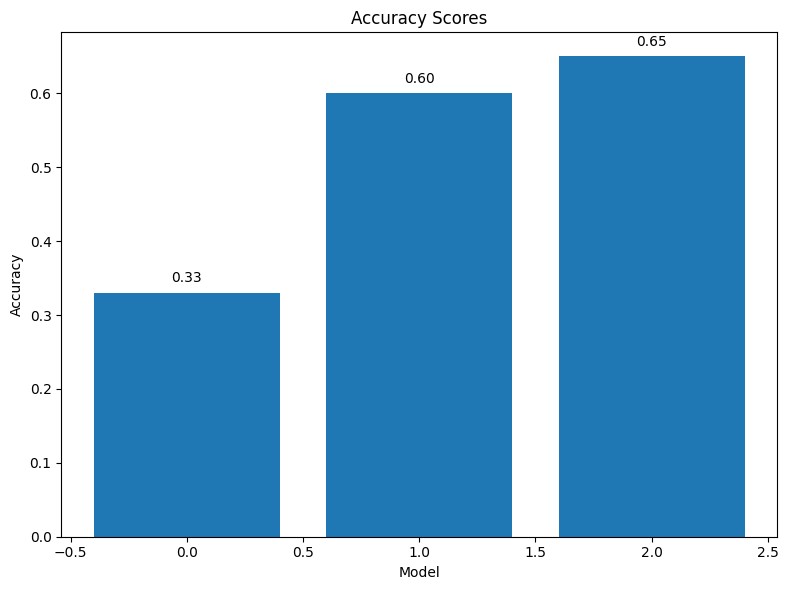

In [12]:
fig,ax = plt.subplots(figsize=(8,6))

accuracy_scores = [0.33, 0.60, 0.65]
models = ['Baseline','KNN', 'ShapeDTW']

bars = ax.bar(range(len(accuracy_scores)), accuracy_scores)

for bar,score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{score:.2f}', ha='center', va='bottom')

ax.set_title('Accuracy Scores')
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')

plt.tight_layout()